In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('wine_data.csv' , header = None , usecols = [0,1,2])
df.columns = ['Class label' , 'Alcohol' , 'Malic acid']

In [5]:
df


,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


C:\Users\PRIT\AppData\Local\Temp\ipykernel_6544\3372989474.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Alcohol'])


<Axes: xlabel='Alcohol', ylabel='Density'>

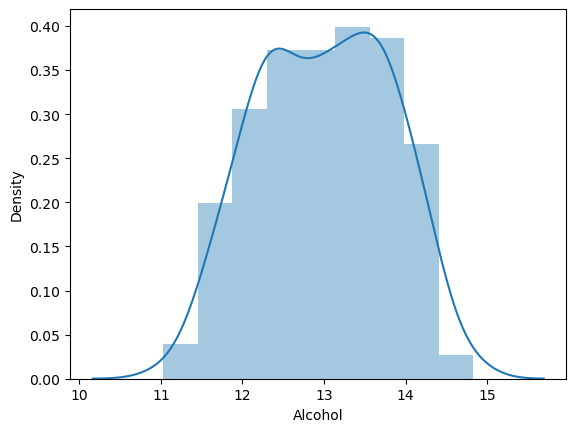

In [8]:
sns.distplot(df['Alcohol'])

C:\Users\PRIT\AppData\Local\Temp\ipykernel_6544\294276057.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Malic acid'])


<Axes: xlabel='Malic acid', ylabel='Density'>

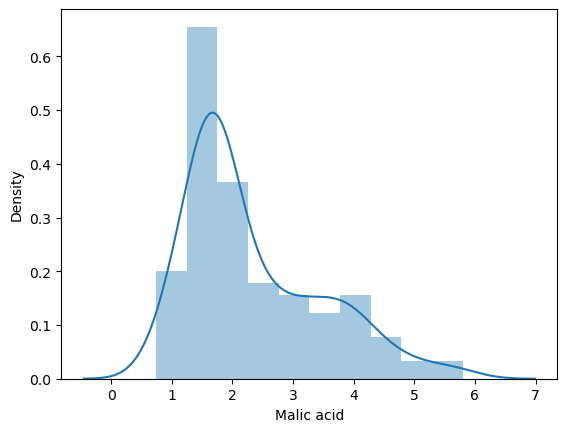

In [11]:
sns.distplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

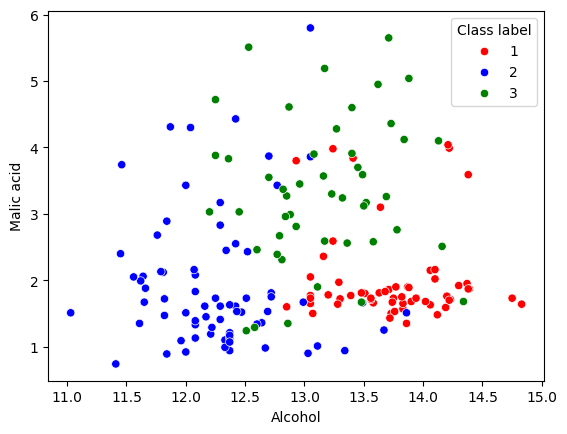

In [17]:
color_dict = {1:'red' , 3:'green' , 2:'blue'}
sns.scatterplot(x = df['Alcohol'] , y = df['Malic acid'] , hue = df['Class label'] , palette = color_dict)

In [18]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df.drop('Class label' , axis =1),
                                                      df['Class label'],
                                                      test_size = 0.3,
                                                      random_state = 0)
x_train.shape , x_test.shape

((124, 2), (54, 2))

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#fit the scalet to the train set  ,it will learn the parameters
scaler.fit(x_train)

#transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled , columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled , columns = x_test.columns)

In [28]:
np.round(x_train.describe() , 1)


,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [29]:
np.round(x_train_scaled.describe() , 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


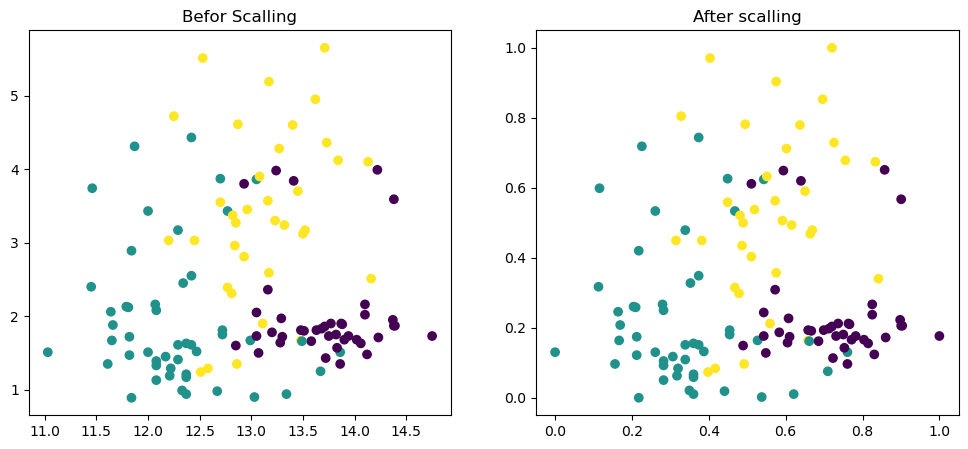

In [32]:
fig , (ax1 ,ax2) = plt.subplots(ncols = 2 , figsize = (12,5))

ax1.scatter(x_train['Alcohol'] , x_train['Malic acid'] , c = y_train)
ax1.set_title("Befor Scalling")
ax2.scatter(x_train_scaled['Alcohol'] , x_train_scaled['Malic acid'] , c = y_train)
ax2.set_title("After scalling")

plt.show()